In [1]:
# Install dependencies
!pip install pandas matplotlib statsmodels



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [4]:
# Simulate monthly time series data
np.random.seed(42)
time = pd.date_range(start='2020-01-01', periods=120, freq='ME')
trend = np.linspace(10, 50, 120)
seasonality = 10 * np.sin(2 * np.pi * time.month / 12)
noise = np.random.normal(0, 2, 120)
data = trend + seasonality + noise
ts = pd.Series(data, index=time)

In [6]:
stl = STL(ts, period=12, robust=True)
result = stl.fit()


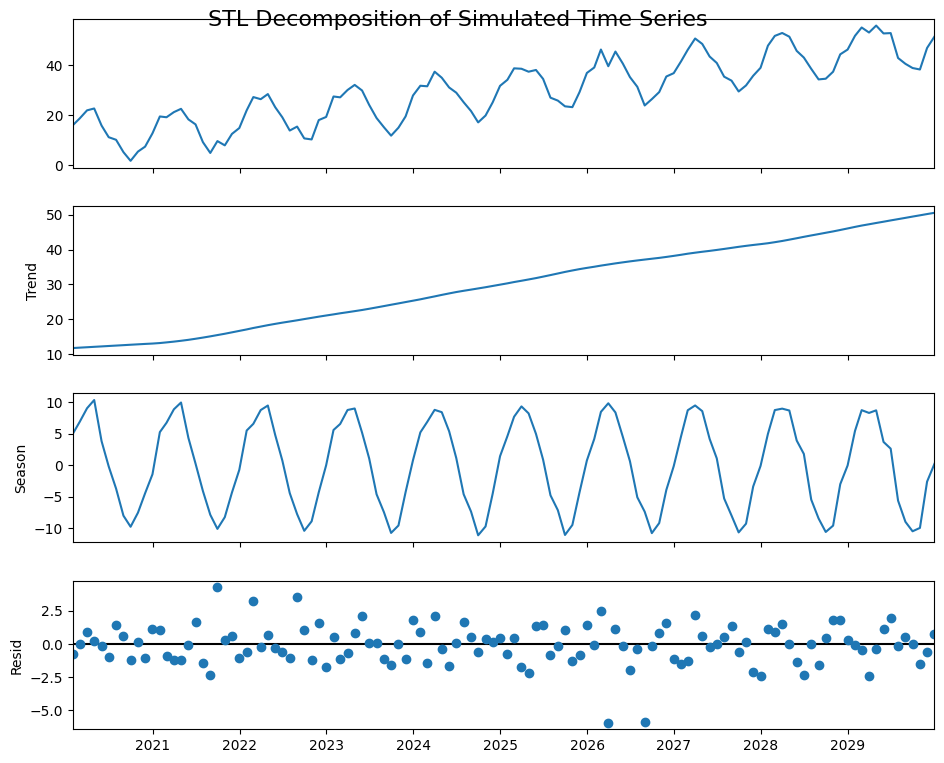

In [7]:
fig = result.plot()
fig.set_size_inches(10, 8)
plt.suptitle('STL Decomposition of Simulated Time Series', fontsize=16)
plt.show()


C:\Users\Sarmita\AppData\Local\Temp\ipykernel_18044\2202474065.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


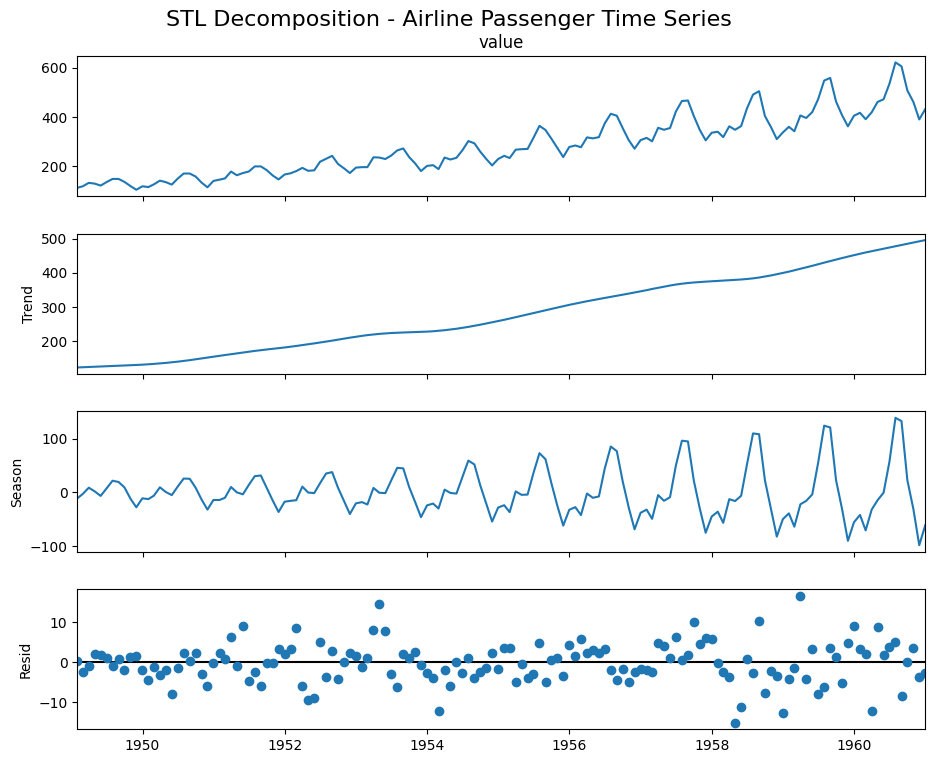

In [8]:
from statsmodels.datasets import get_rdataset

# Load dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
series = data['value']

# STL decomposition
stl = STL(series, period=12)
result = stl.fit()

# Plot the results
fig = result.plot()
fig.set_size_inches(10, 8)
plt.suptitle('STL Decomposition - Airline Passenger Time Series', fontsize=16)
plt.show()
